# 11.9 Large-Scale Pretraining with Transformers

Given larger data for pretraining, the Transformer architecture performs better with an increased model size and training compute, demonstrating superior scaling behavior. Specifically, performance of Transformer-based language models scales as a power law with the amount of model parameters, training tokens, and training compute (Kaplan et al., 2020).

Prior to the compelling success of pretraining Transformers for multimodal data, Transformers were extensively pretrained with a wealth of text. Originally proposed for machine translation, the Transformer architecture in Fig. 11.7.1 consists of an encoder for representing input sequences and a decoder for generating target sequences. Primarily, Transformers can be used in three different modes: encoder-only, encoder–decoder, and decoder-only. To conclude this chapter, we will review these three modes and explain the scalability in pretraining Transformers.

## 11.9.1 Encoder-Only

When only the Transformer encoder is used, a sequence of input tokens is converted into the same number of representations that can be further projected into output (e.g., classification). A Transformer encoder consists of self-attention layers, where all input tokens attend to each other. This design was inspired by an earlier encoder-only Transformer pretrained on text: BERT (Bidirectional Encoder Representations from Transformers) (Devlin et al., 2018).

### Pretraining BERT

BERT is pretrained on text sequences using masked language modeling: input text with randomly masked tokens is fed into a Transformer encoder to predict the masked tokens. In the below figure, an original text sequence “I”, “love”, “this”, “red”, “car” is prepended with the “<cls>” token, and the “<mask>” token randomly replaces “love”; then the crossentropy loss between the masked token “love” and its prediction is to be minimized during pretraining. Thus, prediction of “love” depends on input tokens before and after it in the sequence. This is why BERT is a “bidirectional encoder”. Without need for manual labeling, large-scale text data from books and Wikipedia can be used for pretraining BERT.

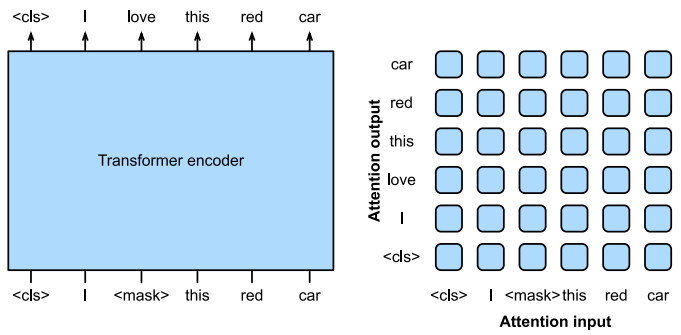


### Fine-Tuning BERT

The pretrained BERT can be fine-tuned to downstream encoding tasks involving single text or text pairs. During fine-tuning, additional layers can be added to BERT with randomized parameters: these parameters and those pretrained BERT parameters will be updated to fit training data of downstream tasks. During fine-tuning, the cross-entropy loss between the prediction and the label on sentiment analysis data is minimized via gradient-based algorithms, where the additional layer is trained from scratch while pretrained parameters of BERT are updated. BERT does more than sentiment analysis. The general language representations learned by the 350- million-parameter BERT from 250 billion training tokens advanced the state of the art for natural language tasks such as single text classification, text pair classification or regression, text tagging, and question answering.

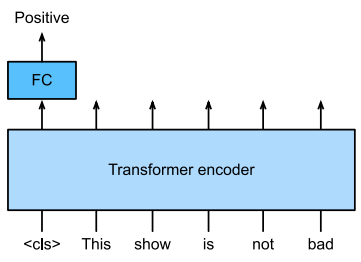

## 11.9.2 Encoder-Decoder

Since a Transformer encoder converts a sequence of input tokens into the same number of output representations, the encoder-only mode cannot generate a sequence of arbitrary length as in machine translation. As originally proposed for machine translation, the Transformer architecture can be outfitted with a decoder that autoregressively predicts the target sequence of arbitrary length, token by token, conditional on both encoder output and decoder output

 - For conditioning on encoder output, encoder–decoder cross-attention (multi-head attention of decoder in Fig. 11.7.1) allows target tokens to attend to all input tokens;
 - For conditioning on decoder output is achieved by a so-called causal attention pattern where any target token can only attend to past and present tokens in the target sequence.


 To pretrain encoder–decoder Transformers beyond human-labeled machine translation data, BART (Lewis et al., 2019) and T5 (Raffel et al., 2020) are two concurrently proposed encoder–decoder Transformers pretrained on large-scale text corpora. Both attempt to reconstruct original text in their pretraining objectives, while the former emphasizes noising input (e.g., masking, deletion, permutation, and rotation) and the latter highlights multitask unification with comprehensive ablation studies.

### Pretraining T5

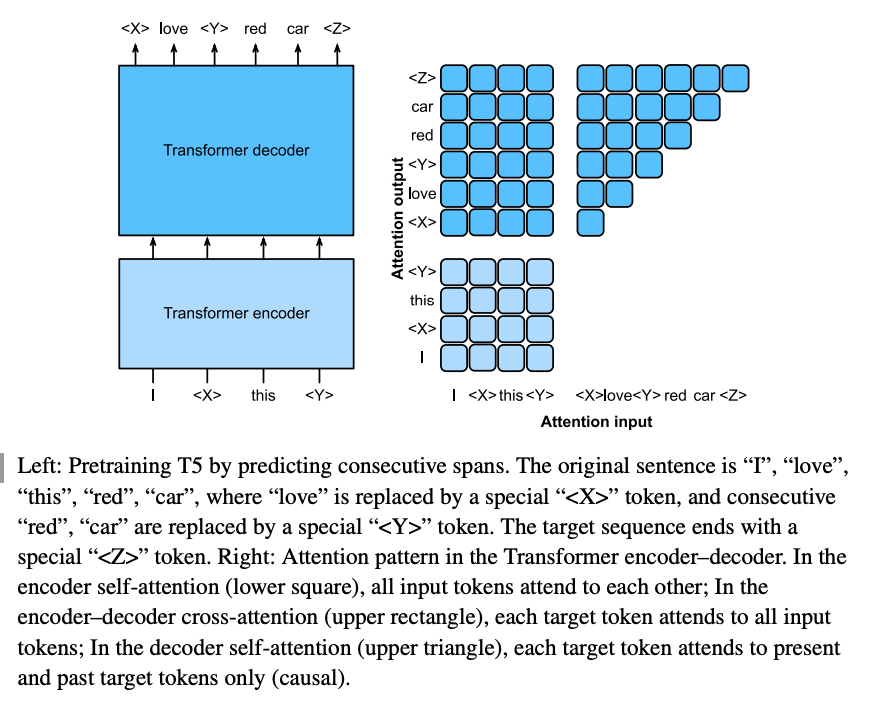

### Fine-Tuning T5

Similar to BERT, T5 needs to be fine-tuned (updating T5 parameters) on task-specific training data to perform this task. Major differences from BERT fine-tuning include: (i) T5 input includes task descriptions; (ii) T5 can generate sequences with arbitrary length with its Transformer decoder; (iii) No additional layers are required.

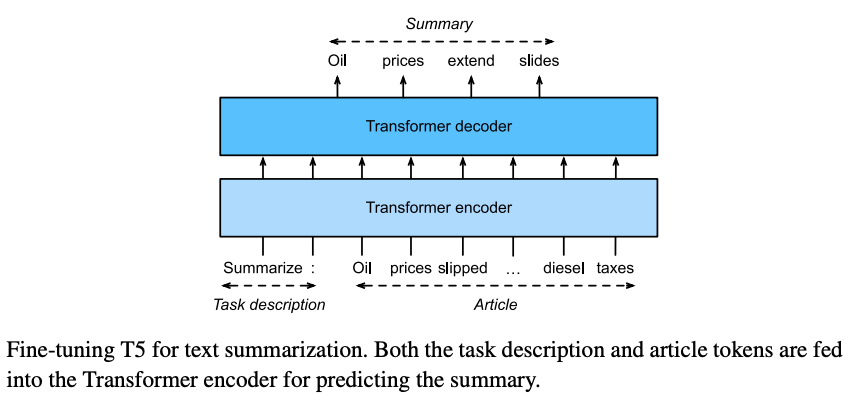

## 11.9.3 Decoder-Only

Alternatively, decoderonly Transformers remove the entire encoder and the decoder sublayer with the encoder– decoder cross-attention from the original encoder–decoder architecture depicted in Fig. 11.7.1.

### GPT and GPT-2

Using language modeling as the training objective, the GPT model chooses a Transformer decoder as its backbone.

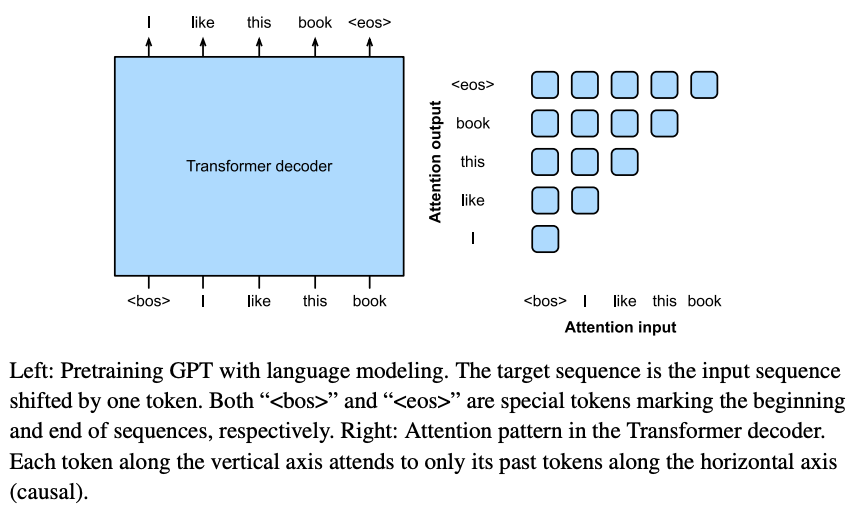

Following the autoregressive language model training as described in Section 9.3.3, Fig. 11.9.6 illustrates GPT pretraining with a Transformer encoder, where the target sequence is the input sequence shifted by one token. Note that the attention pattern in the Transformer decoder enforces that each token can only attend to its past tokens (future tokens cannot be attended to because they have not yet been chosen).


### GPT-3 and Beyond

GPT-2 demonstrated potential of using the same language model for multiple tasks without updating the model. This is more computationally efficient than fine-tuning, which requires model updates via gradient computation.

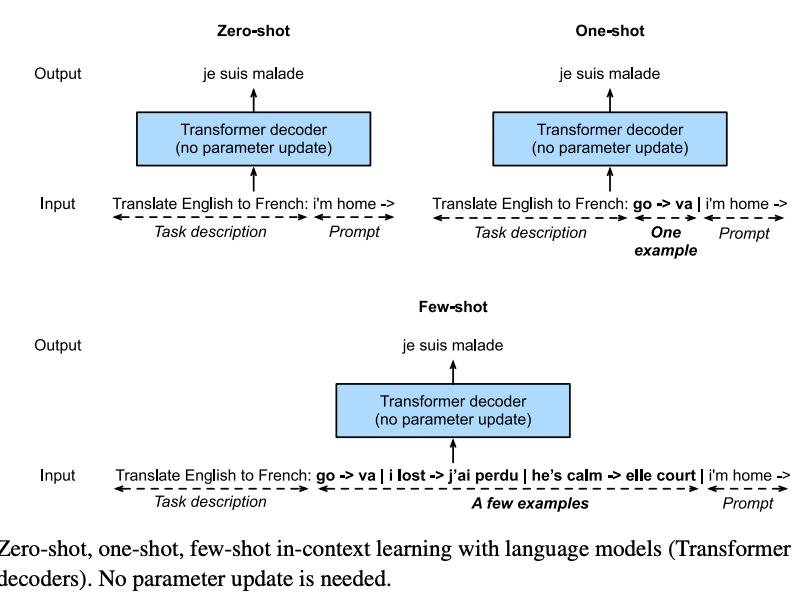

This learning paradigm is called in-context learning (Brown et al., 2020), which can be further categorized into zero-shot, one-shot, and few-shot, when there is no, one, and a few task-specific input–output examples (Fig. 11.9.7).

## 11.9.4 Scalability

Fig. 11.9.8 empirically demonstrates scalability of Transformers in the GPT-3 language model. For language modeling, more comprehensive empirical studies on the scalability of Transformers have led researchers to see promise in training larger Transformers with more data and compute (Kaplan et al., 2020).

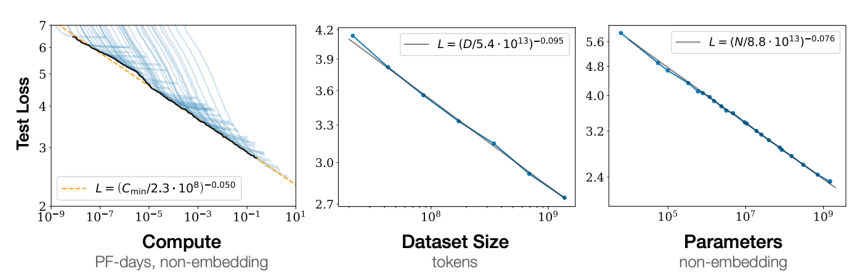

As shown in Fig. 11.9.9, power-law scaling can be observed in the performance with respect to the model size (number of parameters, excluding embedding layers), dataset size (number of training tokens), and amount of training compute (PetaFLOP/s-days, excluding embedding layers).

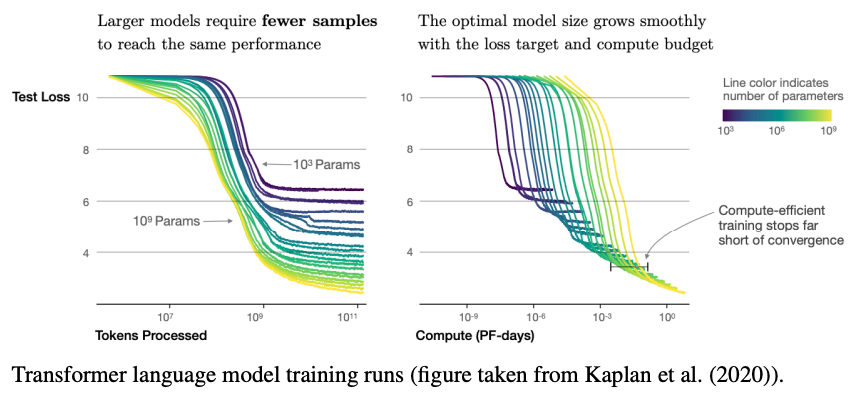